## Exploratory Data Analysis

Life cycle of a Machine learning project:
- Understanding the Problem Statement
- Data Collection
- Data checks to perform
- Exploratory Data analysis
- Data pre-processing
- Model Training
- Model Selection (Choosing the best model for the use case)

## Student Performance Indicator

##### 1) Problem Statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethinicity, Parental Level of education, Lunch and Test preparation course.

##### 2) Data Collection
- Dateset Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- Data Consists of 8 Columns & 1000 rows.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("E:\\mlproject\\notebook\\stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [16]:
#Unique values of categorical columns
print(f'Unique values of gender are: {df['gender'].unique()}')
print(f'Unique values of race ethnicity are: {df['race_ethnicity'].unique()}')
print(f'Unique values of parental level of education are: {df['parental_level_of_education'].unique()}')
print(f'Unique values of lunch are: {df['lunch'].unique()}')
print(f'Unique values of test preparation course are: {df['test_preparation_course'].unique()}')


Unique values of gender are: ['female' 'male']
Unique values of race ethnicity are: ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values of parental level of education are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values of lunch are: ['standard' 'free/reduced']
Unique values of test preparation course are: ['none' 'completed']


Dataset Information:

- There are 5 Categorical Data columns:
    - gender (2)
    - race ethinicity (5)
    - parental level of education (6)
    - lunch (2)
    - test preparation course (2)

- There are 3 Numrical Data:
    - maths score
    - reading score
    - writing score

In [17]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [30]:
categorical_df = [feature for feature in df.columns if df[feature].dtypes =='object']
numerical_df = [feature for feature in df.columns if df[feature].dtypes !='object']
categorical_df, numerical_df

(['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'],
 ['math_score', 'reading_score', 'writing_score'])

In [40]:
df['total_score'] = df['math_score']+df['writing_score']+df['reading_score']
df['avg_score'] = (df['math_score']+df['writing_score']+df['reading_score'])/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [43]:
fmarks_maths = df[df['math_score']==100]['avg_score'].count()
fmarks_read = df[df['reading_score']==100]['avg_score'].count()
fmarks_write = df[df['writing_score']==100]['avg_score'].count()

low_marks_maths = df[df['math_score']<=20]['avg_score'].count()
low_marks_read = df[df['reading_score']<=20]['avg_score'].count()
low_marks_write = df[df['writing_score']<=20]['avg_score'].count()

print(f'Number of Students who scored full marks in maths: {fmarks_maths}')
print(f'Number of Students who scored full marks in reading: {fmarks_read}')
print(f'Number of Students who scored full marks in writing: {fmarks_write}')
print(f'Number of Students who failed in maths: {low_marks_maths}')
print(f'Number of Students who failed in reading: {low_marks_read}')
print(f'Number of Students who failed in writing: {low_marks_write}')

Number of Students who scored full marks in maths: 7
Number of Students who scored full marks in reading: 17
Number of Students who scored full marks in writing: 14
Number of Students who failed in maths: 4
Number of Students who failed in reading: 1
Number of Students who failed in writing: 3


Insight: From above finding we can see number of good performers & bad performers in different examination

##### Data Visualization
- Let's find more inference from ploting the data into graphs

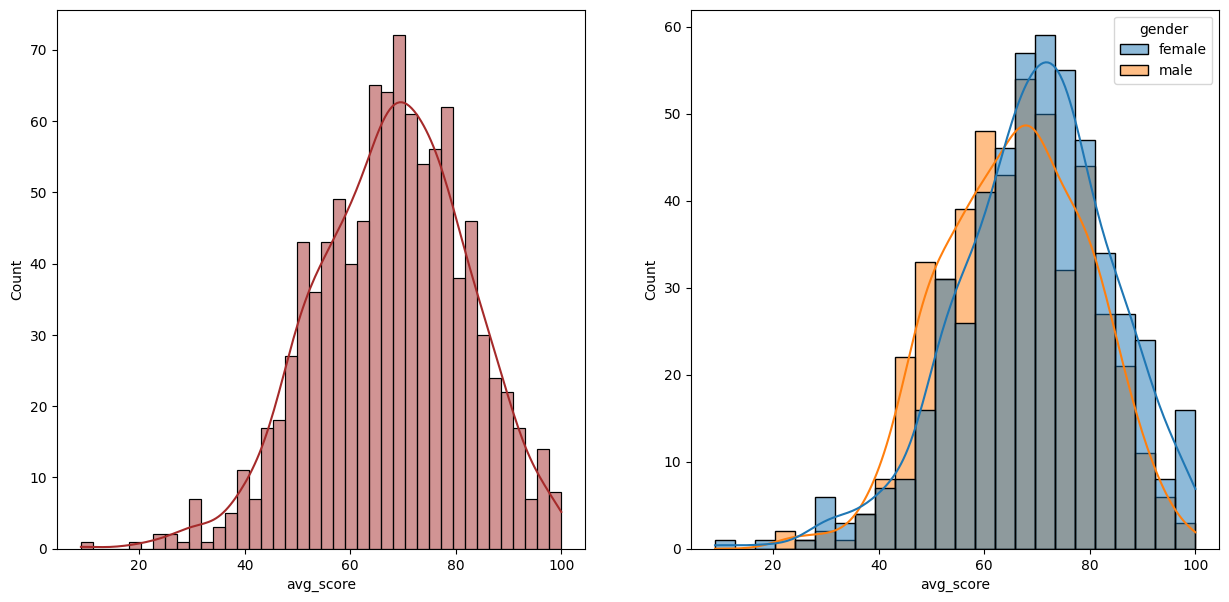

In [59]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121) #1=no_row 2=no_col 1=where to place
sns.histplot(data=df, x="avg_score", bins=40, kde=True, color='brown')
plt.subplot(122)
sns.histplot(data=df, x='avg_score', kde=True, hue='gender')
plt.show()
#hue=adding all the unique categories in same plot with different colors

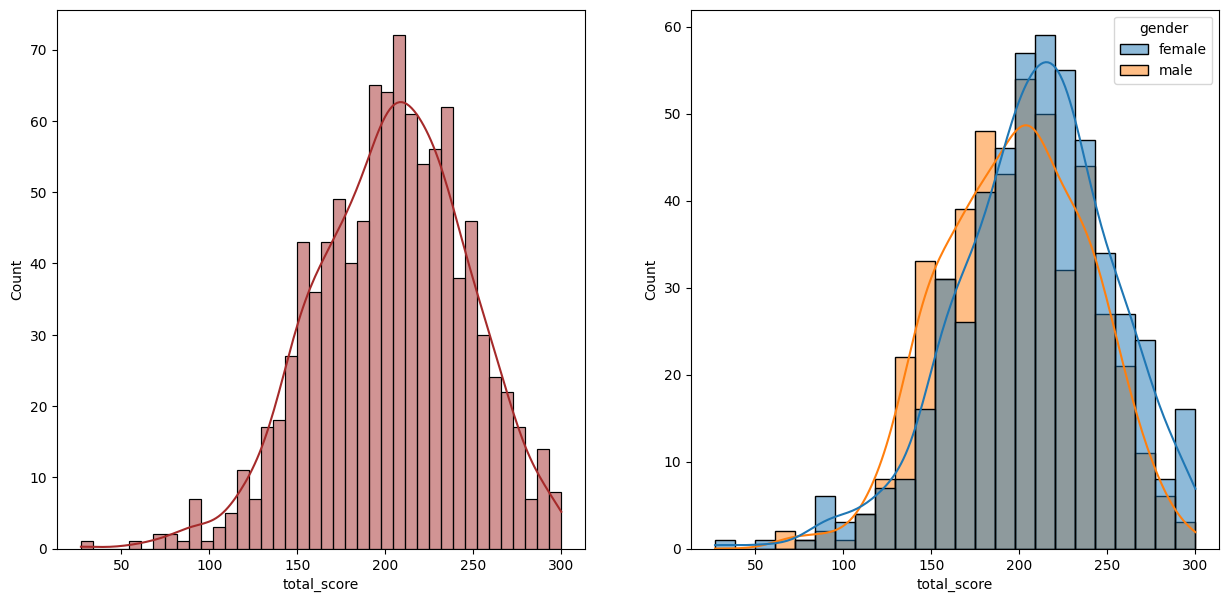

In [60]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121) #1=no_row 2=no_col 1=where to place
sns.histplot(data=df, x="total_score", bins=40, kde=True, color='brown')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

Insight:
Female students tend to have higher marks, as the distribution is shifting more towards right

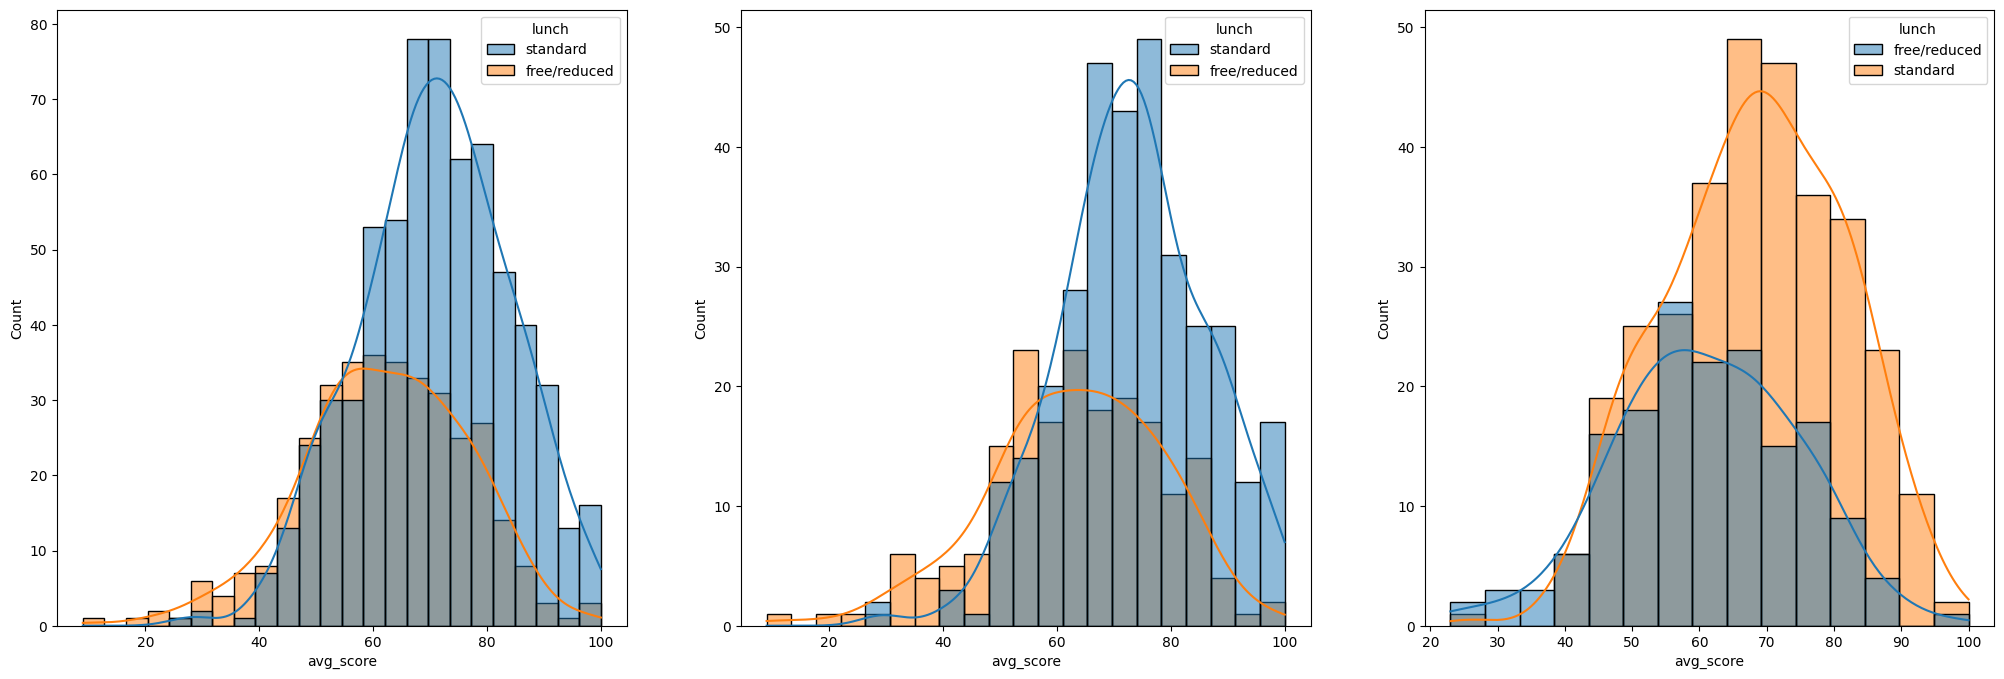

In [70]:
plt.subplots(1, 3, figsize=(25,8))
plt.subplot(131)
sns.histplot(data=df, x='avg_score', kde=True, hue="lunch")
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='avg_score', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='avg_score', kde=True, hue='lunch')
plt.show()
#hue=adding all the unique categories in same plot with different colors

Insight:
Here we can see that "Standard" lunch provides us with better results, almost all the time.

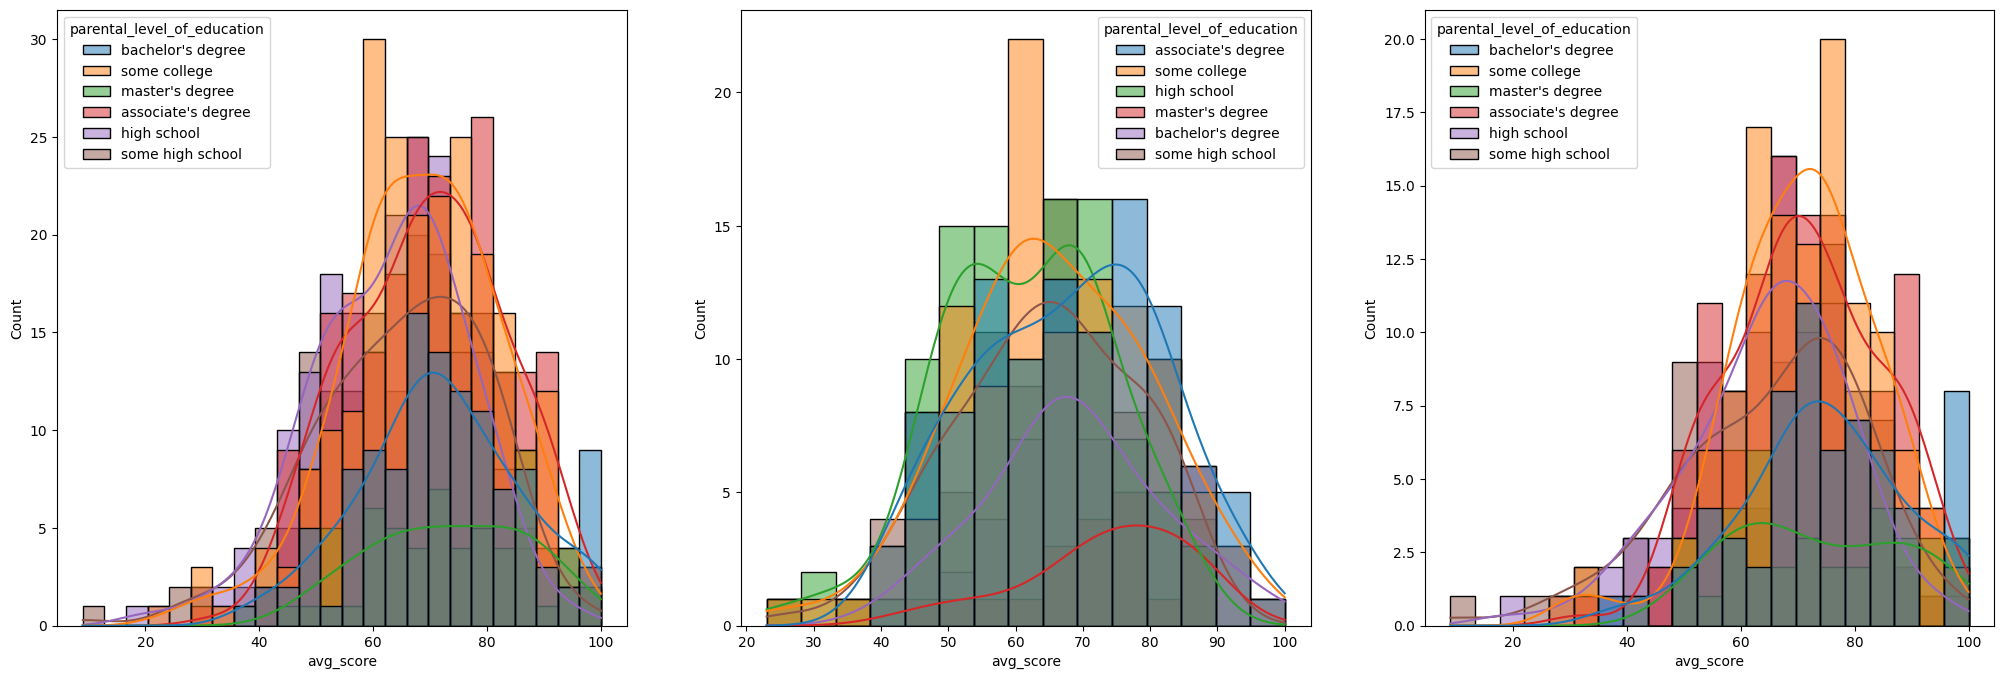

In [72]:
plt.subplots(1, 3, figsize=(25,8))
plt.subplot(131)
sns.histplot(data=df, x='avg_score', kde=True, hue="parental_level_of_education")
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='avg_score', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='avg_score', kde=True, hue='parental_level_of_education')
plt.show()
#hue=adding all the unique categories in same plot with different colors

Insights:
- Parent's education level don't help student perform well in exam
- 2nd plot shows that there is some effect of parental level of education on male candidate.
- 3rd plot shows that there is NO effect of parent's education on female students

Maximum Score of students in all three subjects

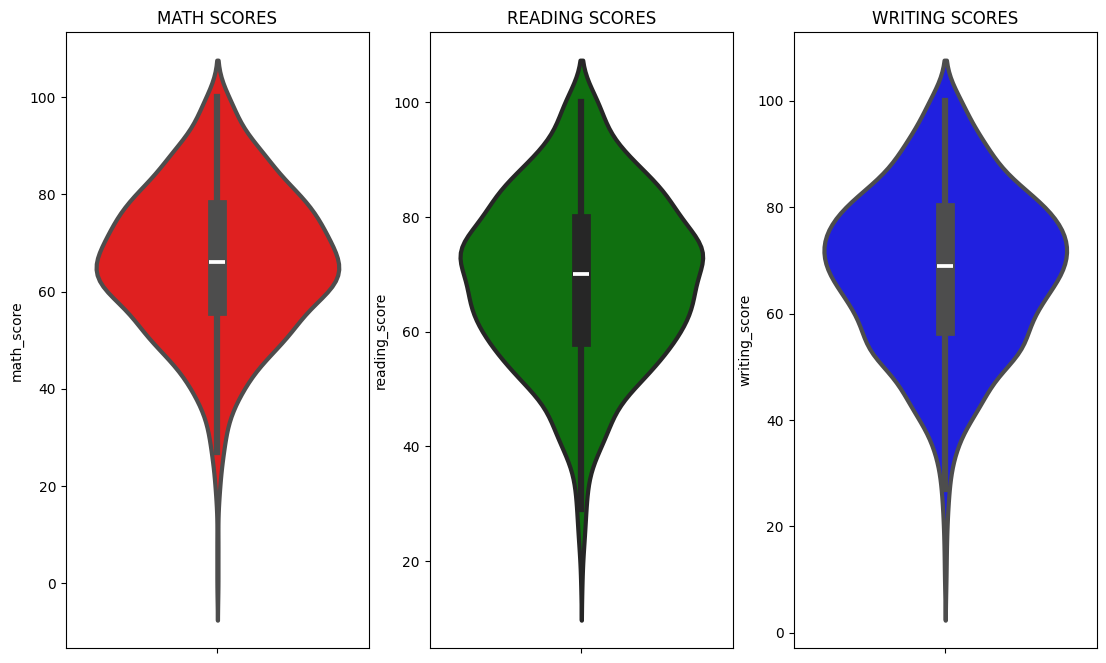

In [76]:
plt.figure(figsize=(18, 8))
#plt.subplots(1, 3, figsize=(25,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()

Insights: most of the students scored between 60-80 in maths_score, reading_score 50-80

Multivariate Analysis using pieplot

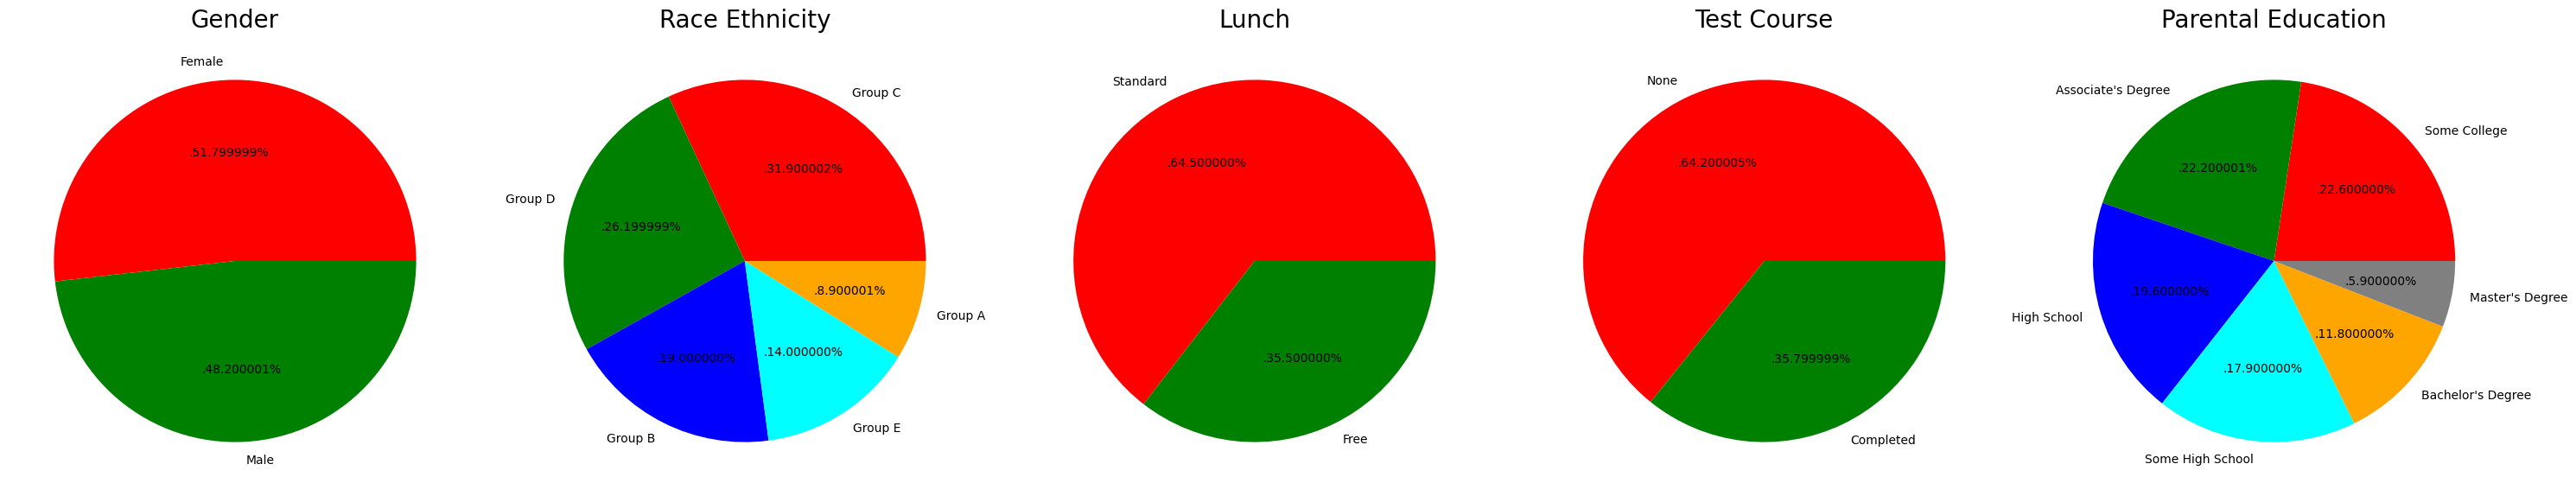

In [78]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels='Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct='.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


Insights:
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

Feature Wise Visualization
GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

UNIVARIATE ANALYSIS

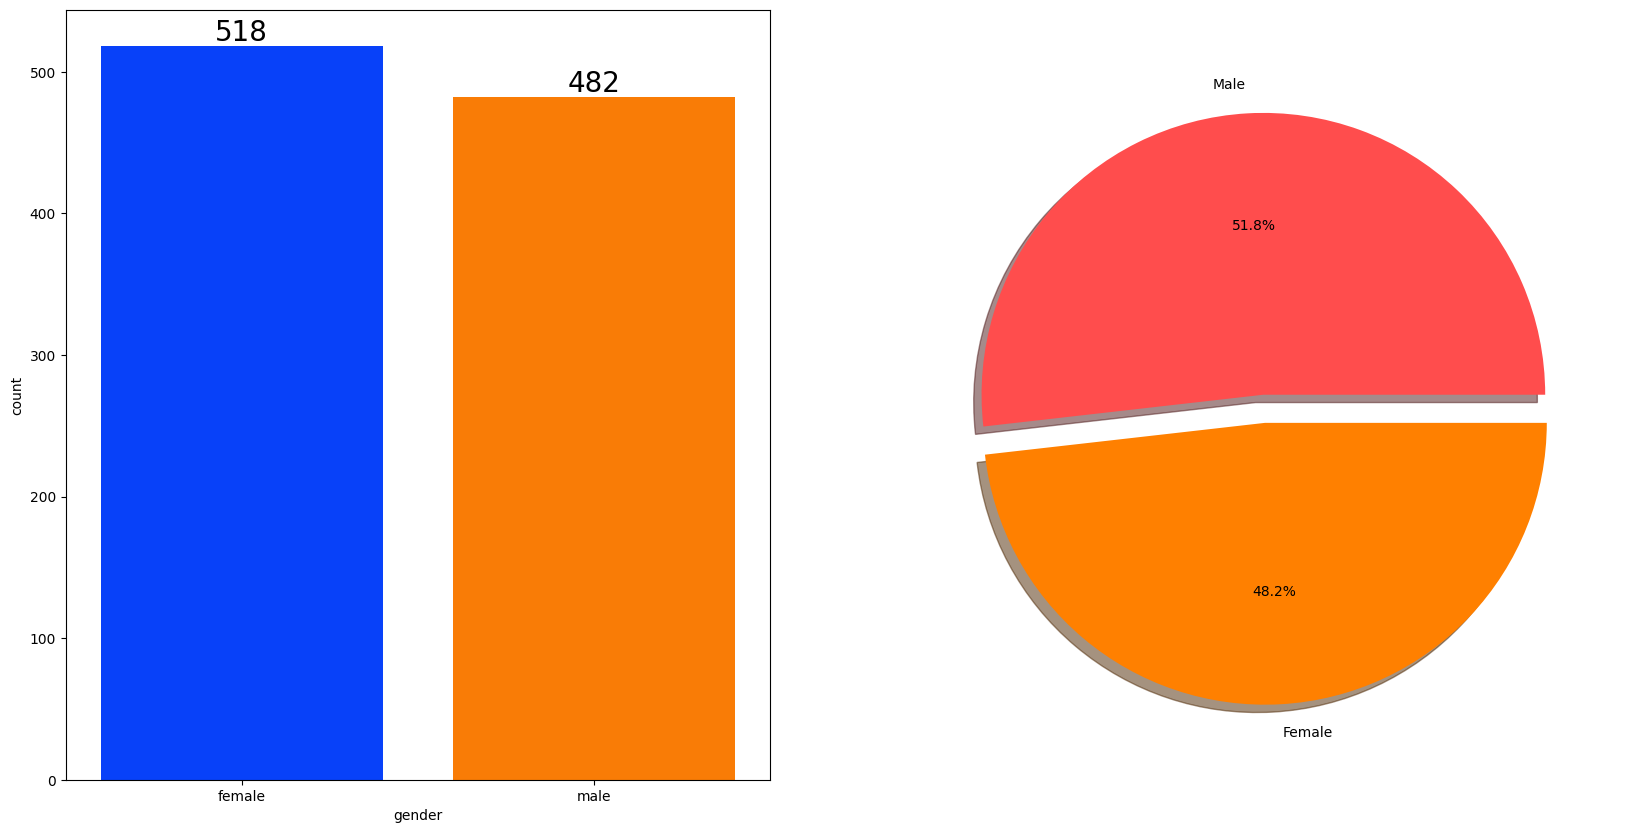

In [79]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male','Female'], explode=[0,0.1], autopct='%1.1f%%', shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights:
- Gender has a balanced data with female students are 518, and male students are 482

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [ ]:
gender_group = df.groupby('gender').mean()
gender_group

In [ ]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

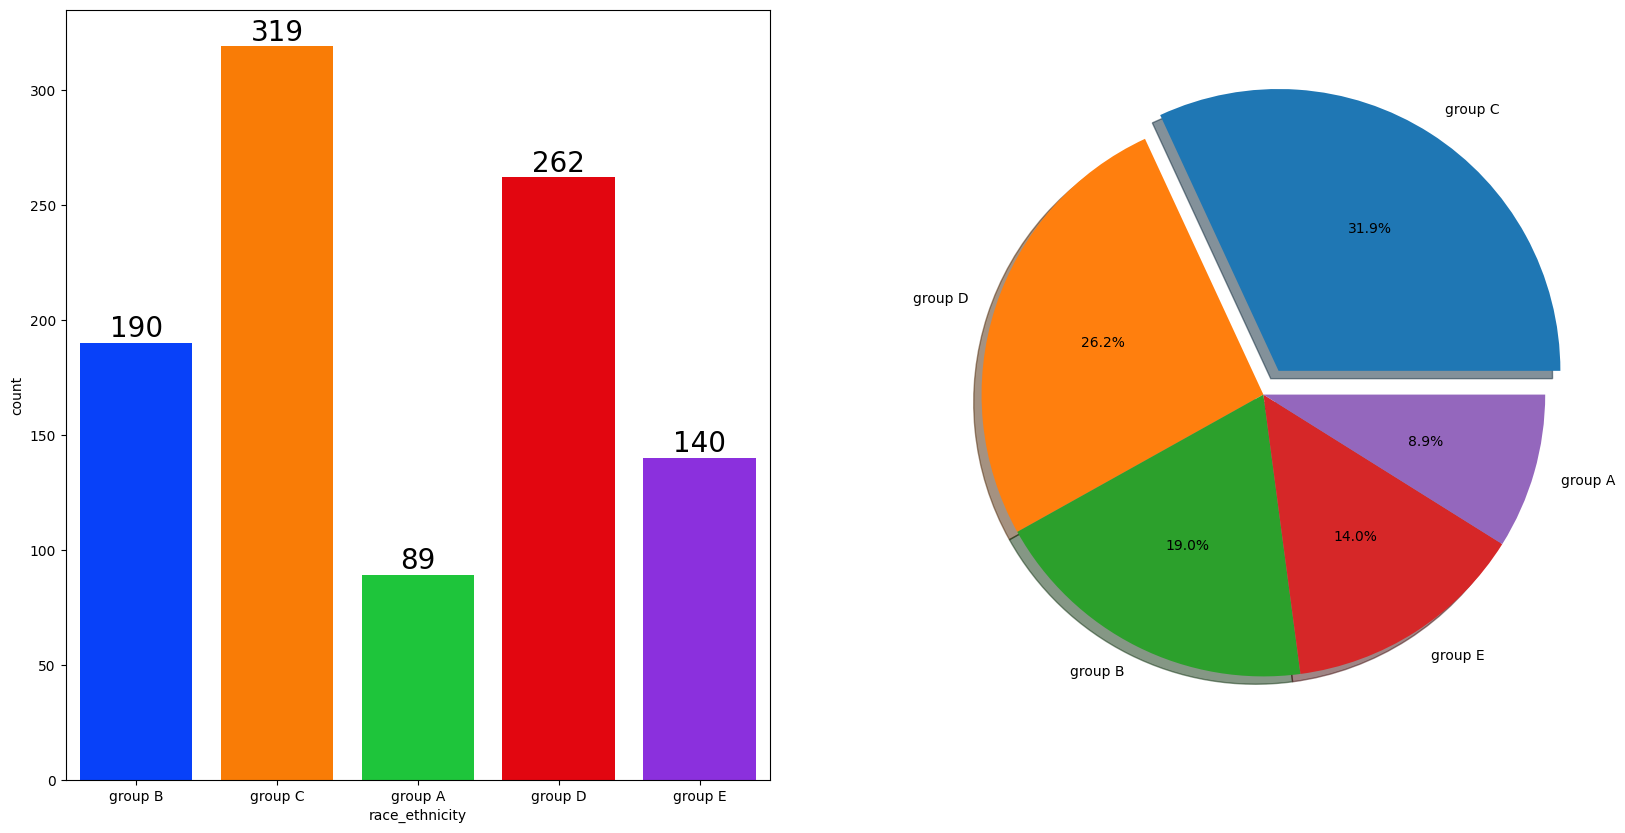

In [84]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

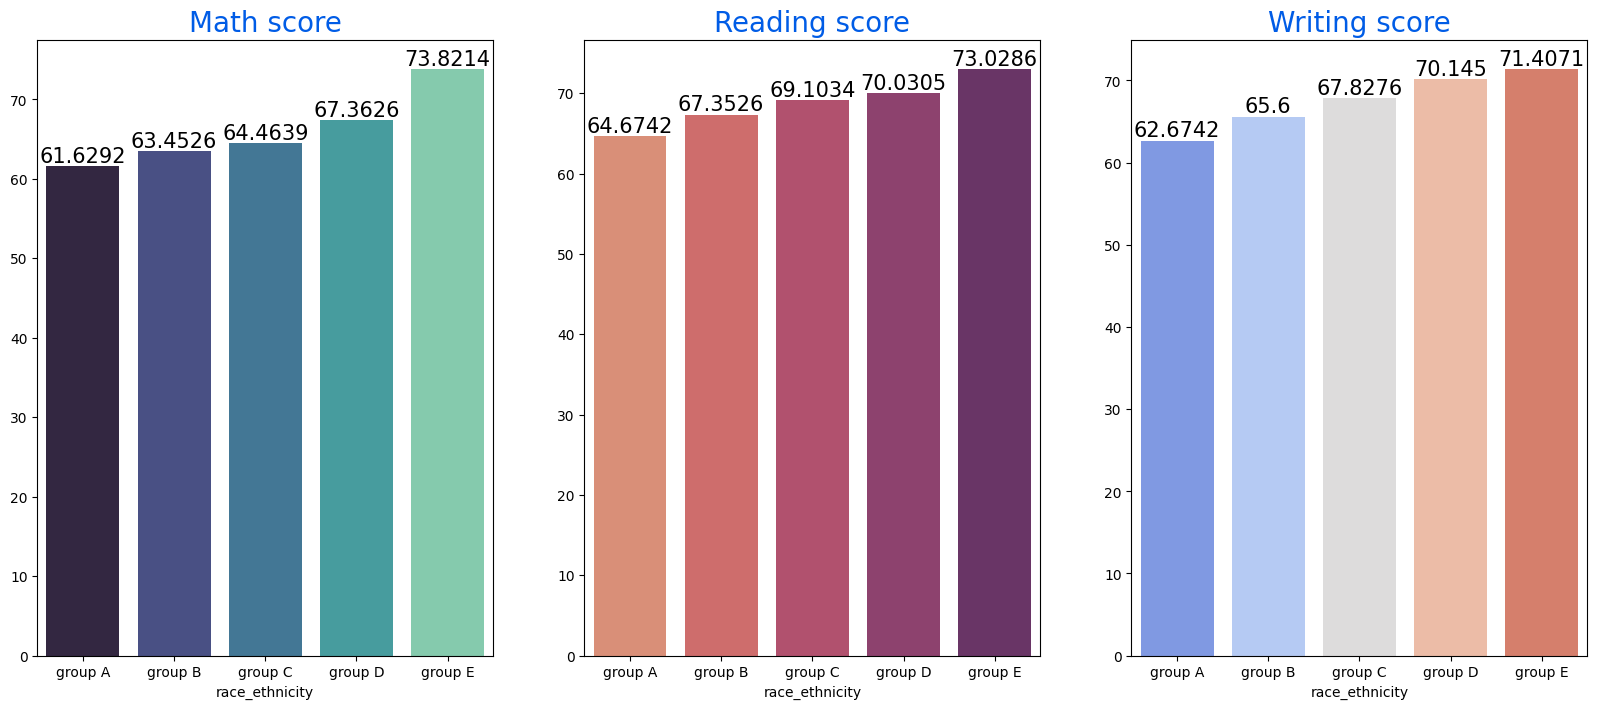

In [86]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights:
- Group E students have scored the highest in every subject
- Group A students have scored the lowest in mostly every subject
- Student from lower socioeconomic status have a lower avg in all subjects

UNI & BIVARIATE Analysis (parental_level_of_education)

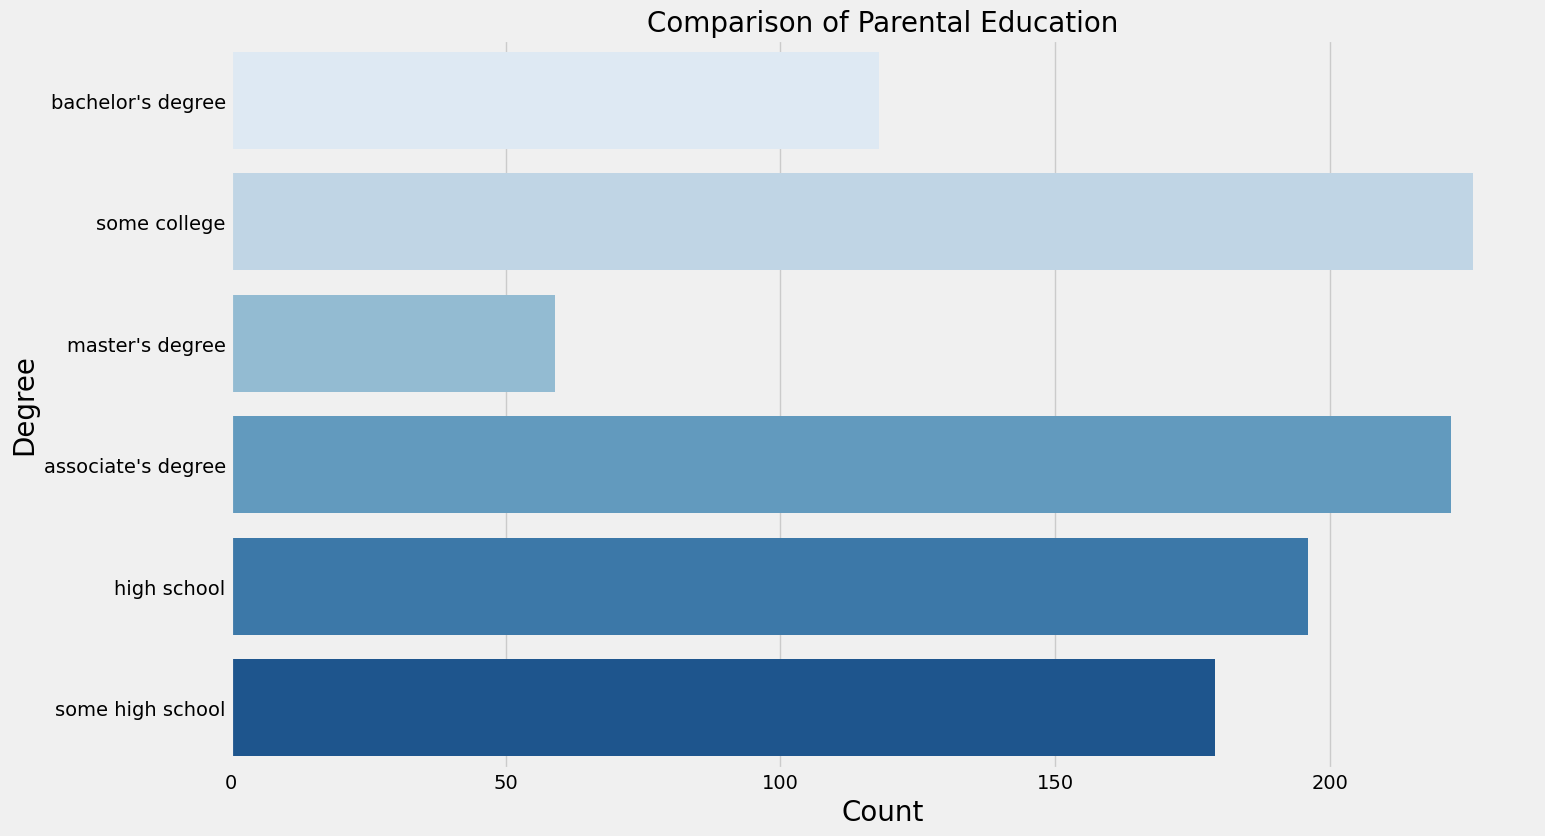

In [94]:
plt.rcParams['figure.figsize'] = (15, 9)

plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette="Blues")
plt.title("Comparison of Parental Education", fontweight = 30, fontsize = 20)
plt.xlabel("Count", fontsize=20) #fix here in the parent
plt.ylabel("Degree", fontsize=20)
plt.show()

Insight:
- Largest number of parents are from "Some College"

In [ ]:
df.groupby('parental_level_of_education').agg("mean").plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

UNI & BIVARIATE ANALYSIS for "Lunch"

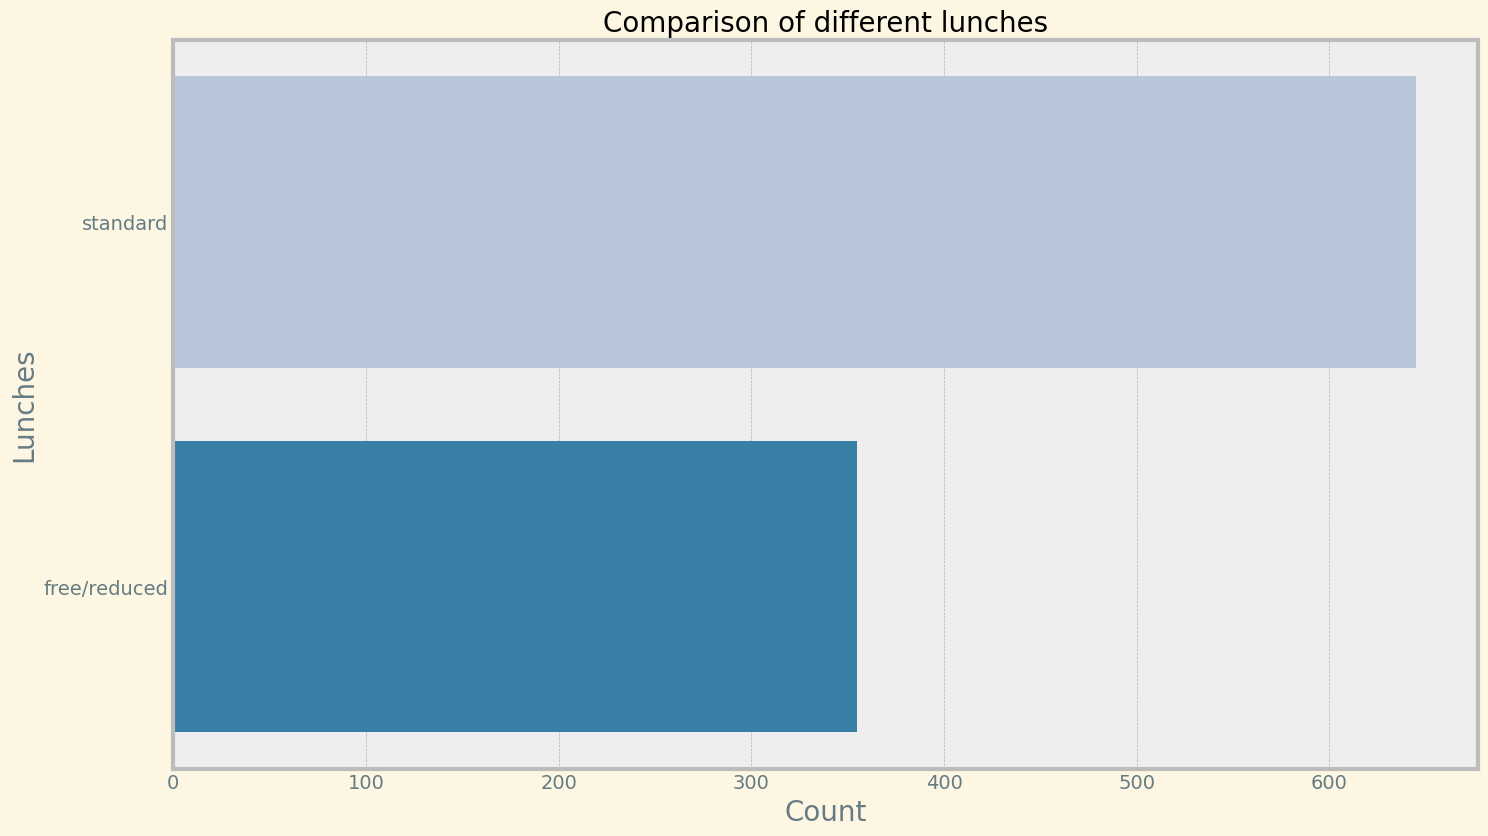

In [101]:
plt.rcParams['figure.figsize'] = (15, 9)

plt.style.use('bmh')
sns.countplot(df['lunch'], palette="PuBu")
plt.title("Comparison of different lunches", fontweight = 30, fontsize = 20)
plt.xlabel("Count", fontsize=20) #fix here in the parent
plt.ylabel("Lunches", fontsize=20)
plt.show()

Insight:
- Students are fed more of Standard Lunchs compared to free/reduced ones

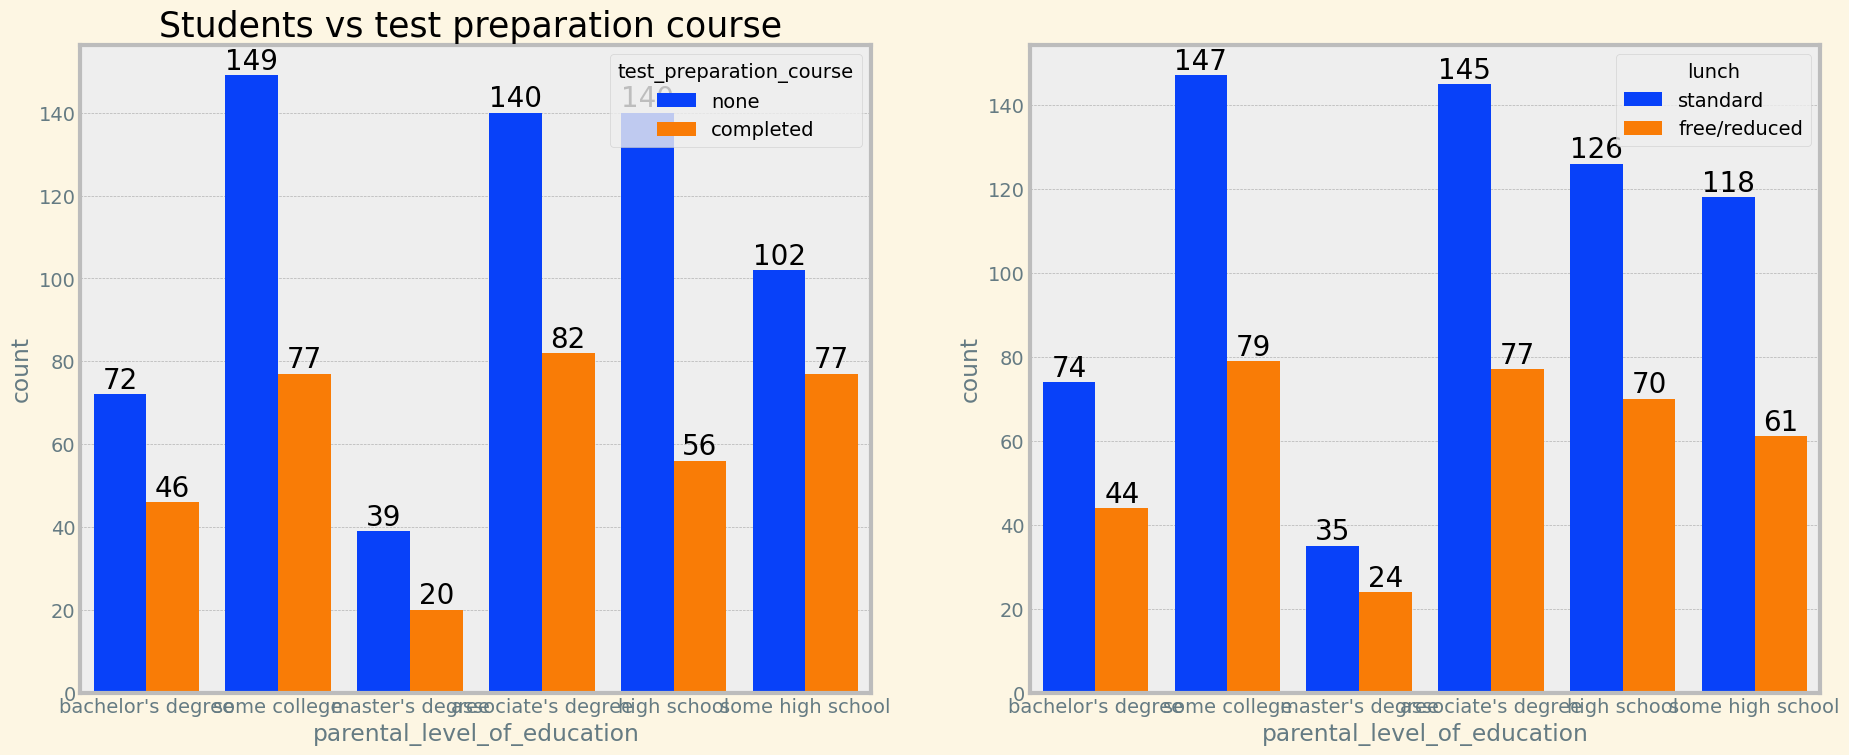

In [102]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

Insights:
- Students who get standard lunch tend to perform better than students who get free/reduced lunch

<Axes: xlabel='lunch', ylabel='writing_score'>

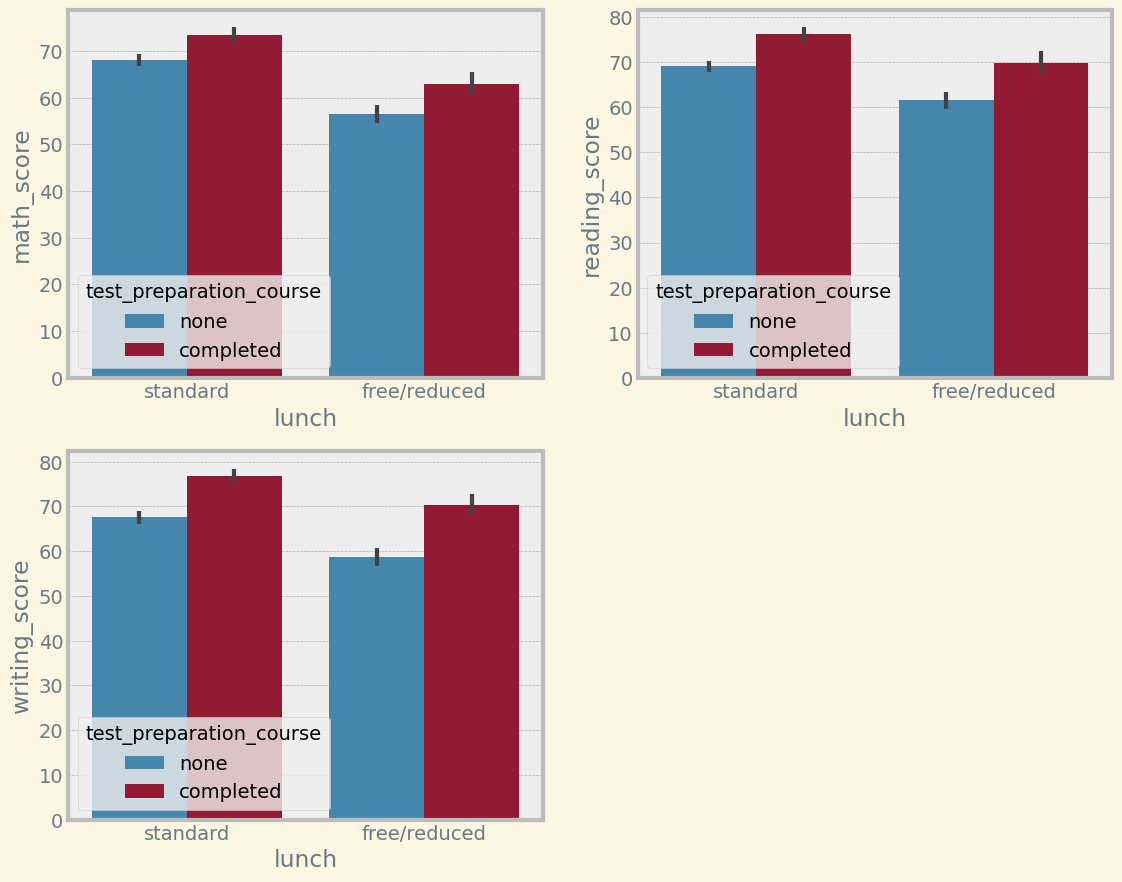

In [104]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

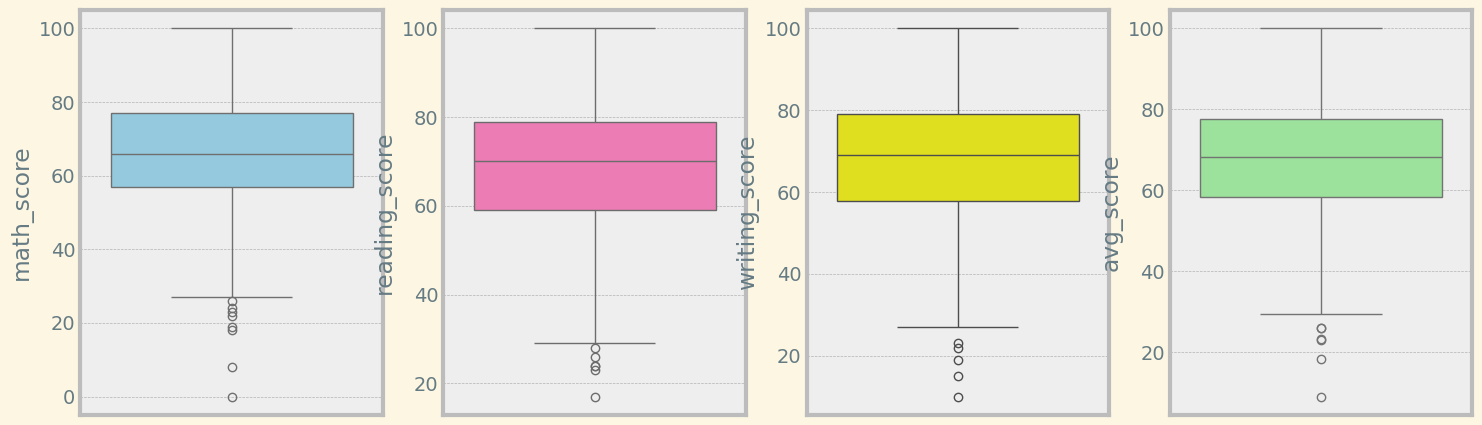

In [105]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='lightgreen')
plt.show()

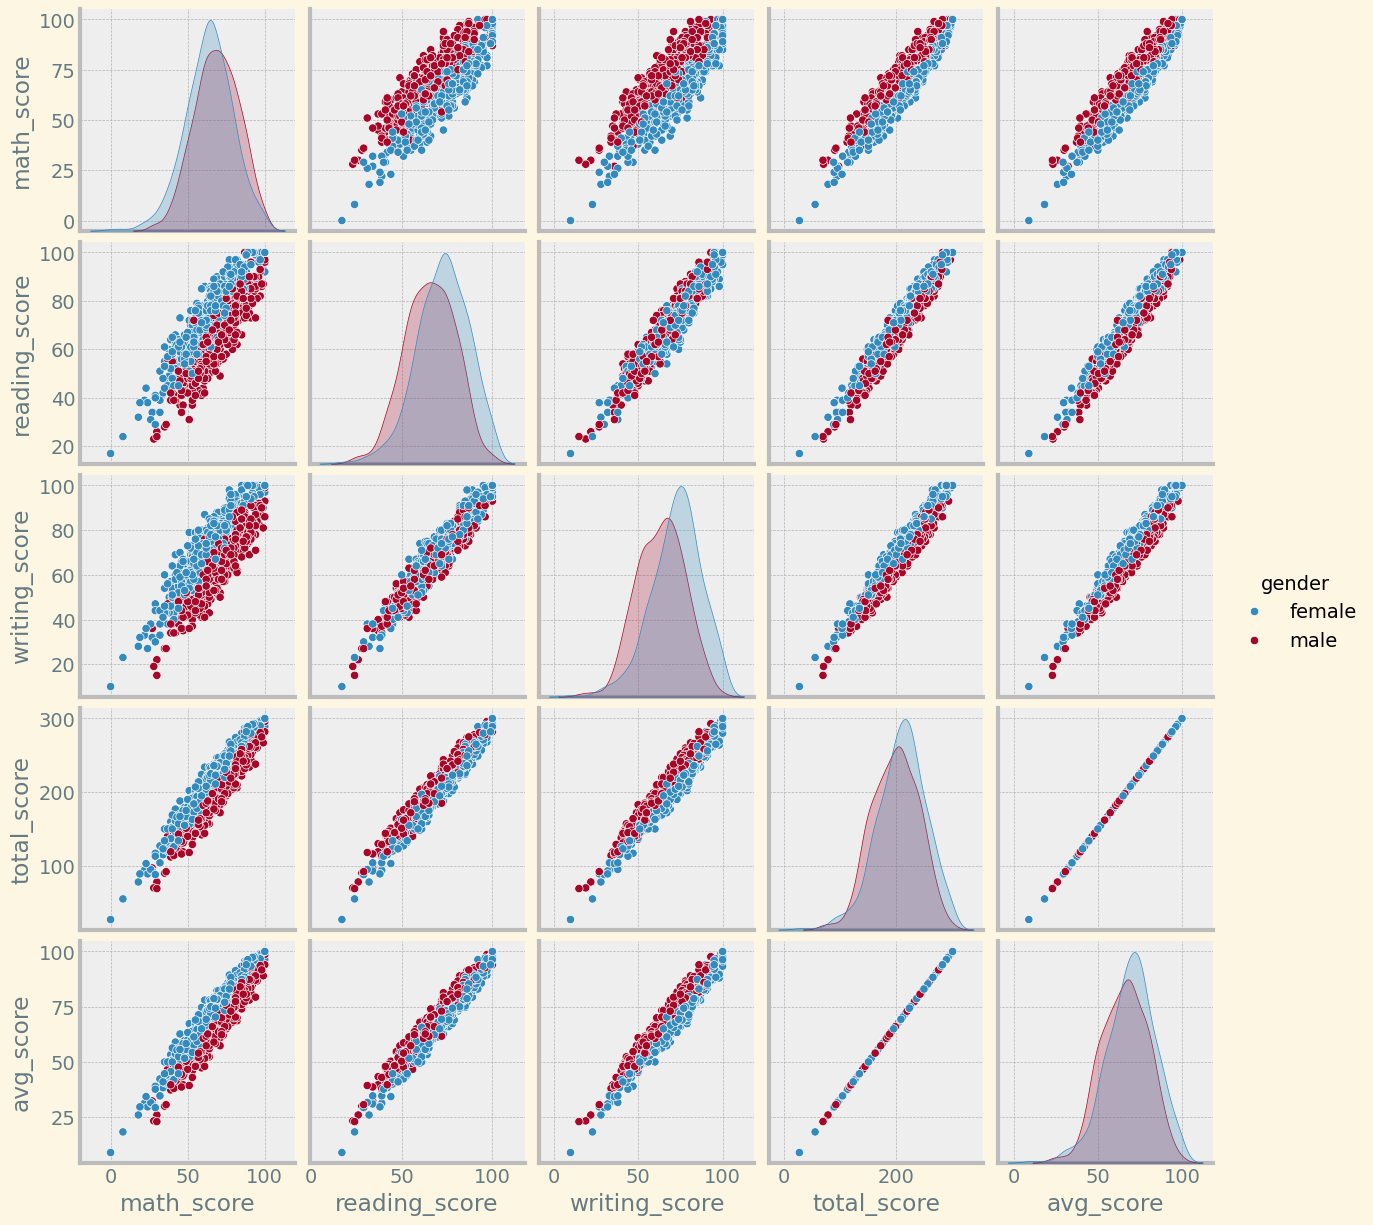

In [106]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights
From the above plot it is clear that all the scores increase linearly with each other.

Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.